# Setup

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

pd.set_option('display.max_colwidth',200)

In [5]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

In [8]:
from src.ingestion.loader import load_dataset

/Users/aiman/Studium/Master/2.Semester/EDML/ml-data-profiler/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-06 13:17:18.838 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


# Load Dataset

In [11]:
url = "https://huggingface.co/datasets/scikit-learn/adult-census-income"

In [29]:
url = "https://www.kaggle.com/datasets/adarsh1077/comprehensive-vehicle-specifications-dataset"

In [31]:
df = load_dataset(url)

2025-07-06 13:19:13.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 13:19:13.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 13:19:13.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Dataset URL: https://www.kaggle.com/datasets/adarsh1077/comprehensive-vehicle-specifications-dataset


2025-07-06 13:19:13.883 Thread 'Thread-7': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 13:19:13.885 Thread 'Thread-7': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 13:19:15.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-06 13:19:15.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


../../data/kaggle_temp/structured_bike_data_cleaned.json was deleted.


In [15]:
target_col = "income"
sensitive_col = ["sex", "race"]

In [33]:
df

brand               name                                       price  \
0        Honda       Honda SP 125     Rs.89,468 - 1 Lakh*(View On Road Price)   
1        Honda        Honda Shine     Rs.83,251 - 89,772*(View On Road Price)   
2        Honda   Honda Hornet 2.0    Rs.1.43 - 1.57 Lakh*(View On Road Price)   
3        Honda        Honda SP160    Rs.1.21 - 1.28 Lakh*(View On Road Price)   
4        Honda  Honda Hness CB350    Rs.2.11 - 2.16 Lakh*(View On Road Price)   
..         ...                ...                                         ...   
556  e-Sprinto       e-Sprinto LS     Rs.76,000 - 82,000*(View On Road Price)   
557  e-Sprinto    e-Sprinto Roamy              Rs.54,999*(View On Road Price)   
558  e-Sprinto         Sprinto HS     Rs.86,000 - 97,000*(View On Road Price)   
559     iVOOMi      iVOOMi Jeet X  Rs.84,999 - 1.05 Lakh*(View On Road Price)   
560     iVOOMi          iVOOMi S1     Rs.54,999 - 84,999*(View On Road Price)   

    rating     mileage         cc     power  type  
0    4.5/5     60 kmpl  123.94 cc  10.87 PS  bike  
1    4.3/5     55 kmpl  123.94 cc  10.74 PS  bike  
2    4.7/5  57.35 kmpl   184.4 cc  17.26 PS  bike  
3    4.6/5     65 kmpl  162.71 cc  13.46 PS  bike  
4    4.3/5   45.8 kmpl  348.36 cc  21.07 PS  bike  
..     ...         ...        ...       ...   ...  
556  4.0/5       250 W     3-4 Hr       NaN  bike  
557  3.7/5       250 W     3-4 Hr       NaN  bike  
558  5.0/5       800 W     3-4 Hr       NaN  bike  
559  4.7/5      2.1 kW    5.45 Hr       NaN  bike  
560  4.4/5      1.8 kW        NaN       NaN  bike  

[561 rows x 8 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   brand    561 non-null    object
 1   name     561 non-null    object
 2   price    561 non-null    object
 3   rating   561 non-null    object
 4   mileage  544 non-null    object
 5   cc       455 non-null    object
 6   power    272 non-null    object
 7   type     561 non-null    object
dtypes: object(8)
memory usage: 35.2+ KB


In [37]:
df.size

4488

In [65]:
df.shape

(561, 8)

In [53]:
df.isna().sum().sum()

np.int64(412)

In [57]:
df.duplicated().sum()

np.int64(0)

In [61]:
df.memory_usage(deep=True).sum()

Index        132
brand      31771
name       36523
price      47653
rating     30294
mileage    30847
cc         28637
power      24536
type       29733
dtype: int64

In [43]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [89]:
df["name"].dropna().map(type).nunique()

1

In [109]:
df["name"].sample(1)

84    Bajaj Pulsar RS200
Name: name, dtype: object

In [91]:
MODEL_REGISTRY = {"Logistic Regression": "logistic", "Support Vector Machine": "svm"}

In [105]:
list(MODEL_REGISTRY.keys())

['Logistic Regression', 'Support Vector Machine']

In [44]:
df.describe(include='all').to_dict()

{'age': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 38.58164675532078,
  'std': 13.640432553581341,
  'min': 17.0,
  '25%': 28.0,
  '50%': 37.0,
  '75%': 48.0,
  'max': 90.0},
 'workclass': {'count': 32561,
  'unique': 9,
  'top': 'Private',
  'freq': 22696,
  'mean': nan,
  'std': nan,
  'min': nan,
  '25%': nan,
  '50%': nan,
  '75%': nan,
  'max': nan},
 'fnlwgt': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 189778.36651208502,
  'std': 105549.97769702224,
  'min': 12285.0,
  '25%': 117827.0,
  '50%': 178356.0,
  '75%': 237051.0,
  'max': 1484705.0},
 'education': {'count': 32561,
  'unique': 16,
  'top': 'HS-grad',
  'freq': 10501,
  'mean': nan,
  'std': nan,
  'min': nan,
  '25%': nan,
  '50%': nan,
  '75%': nan,
  'max': nan},
 'education.num': {'count': 32561.0,
  'unique': nan,
  'top': nan,
  'freq': nan,
  'mean': 10.0806793403151,
  'std': 2.5727203320673877,
  'min': 1.0,
  '25%': 9.0,
  '50%': 10.0,
  '75%': 12.

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, num_cols=None, cat_cols=None):
    if num_cols is None:
        num_cols = df.select_dtypes(include='number').columns
    if cat_cols is None:
        cat_cols = df.select_dtypes(include='object').columns

    for col in num_cols:
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    for col in cat_cols:
        df[col].value_counts().plot(kind='bar')
        plt.title(f"Category Distribution: {col}")
        plt.xticks(rotation=45)
        plt.show()

def plot_correlation(df):
    corr = df.select_dtypes(include='number').corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


In [57]:
df_cor = df[['sex','race', 'income']]

In [59]:
df_cor.dtypes

sex       object
race      object
income    object
dtype: object

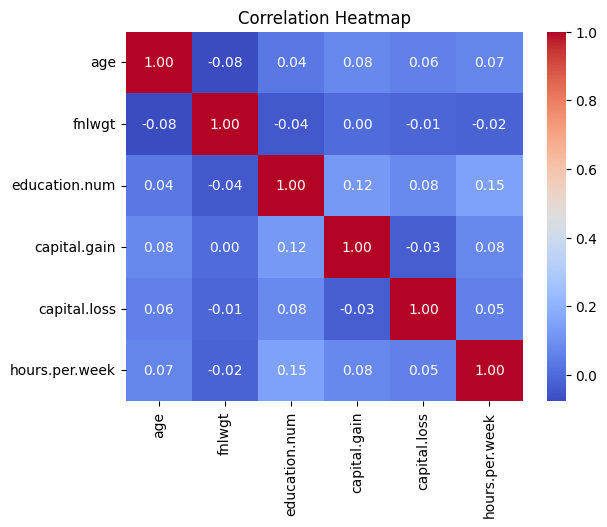

In [61]:
plot_correlation(df)

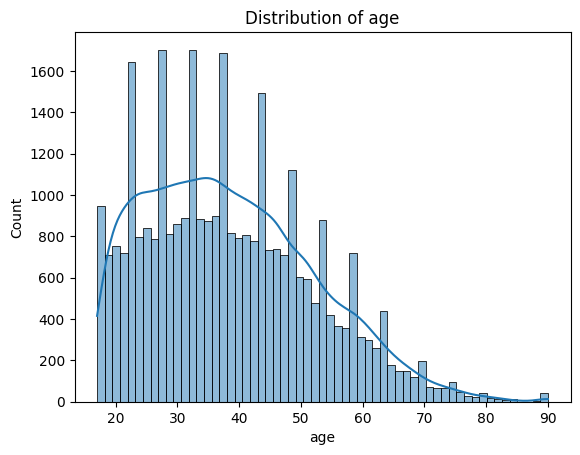

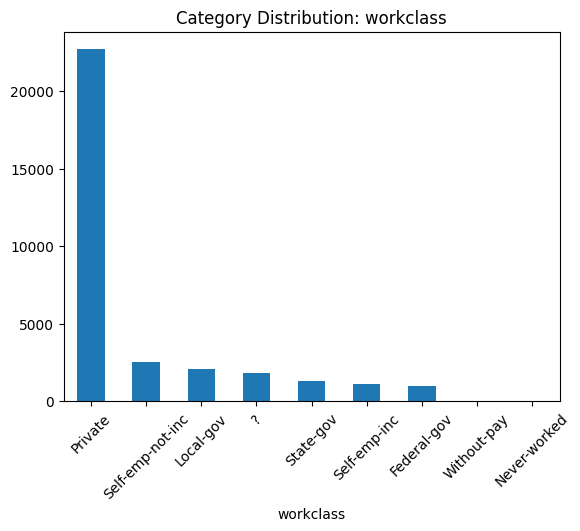

In [63]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

plot_distributions(df, num_cols=num_cols[:1], cat_cols=cat_cols[:1] )

In [65]:
df[target_col].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [67]:
counts =df[target_col].value_counts()
counts

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [196]:
import re
def plot_data_distribution_by_column(df, column_name, save=False, save_path=""):
    """Plot the distribution of values in a DataFrame column.
    
    For categorical columns: bar plot with counts and percentages.
    For numerical columns: histogram with counts.
    """
    data = df[column_name]

    title =  re.sub(r'[_\-.]', ' ', column_name).title()

    if pd.api.types.is_numeric_dtype(data):
        # Numerical column: histogram
        plt.hist(data, bins='auto', edgecolor='black')
        plt.xlabel(title)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {title}")
    else:
        # Categorical column: bar plot with count + percentage
        counts = data.value_counts()
        total = counts.sum()
        ax = counts.plot(kind='bar')
        for i, (label, count) in enumerate(counts.items()):
            pct = count / total * 100
            ax.text(i, count + total * 0.01, f"{count} ({pct:.2f}%)", ha='center', fontsize=9)
        plt.xlabel(title)
        plt.ylabel("Number of Instances")
        plt.title(f"Distribution of {title}")

    if save and save_path:
        plt.savefig(f"{save_path}/{column_name}_distribution.png", bbox_inches="tight")

    plt.show()
    plt.close()    

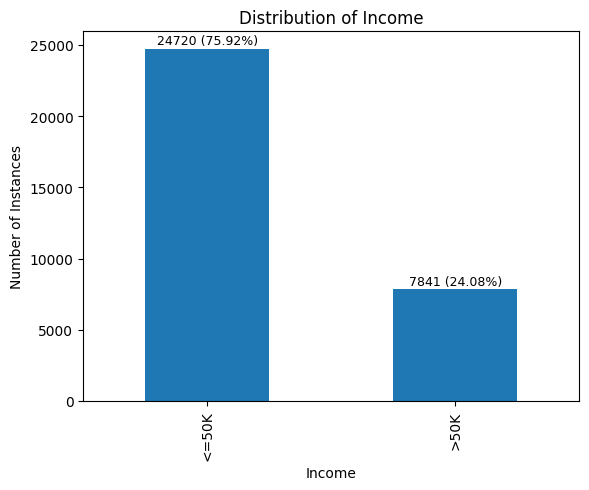

In [198]:
plot_data_distribution_by_column(df, target_col)

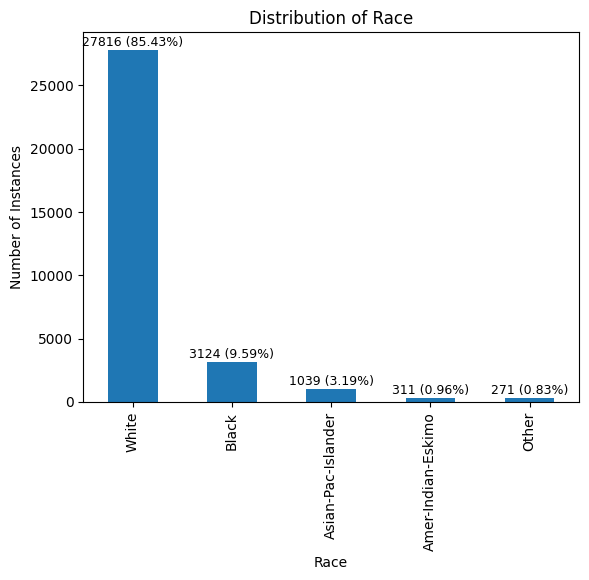

In [200]:
plot_data_distribution_by_column(df, sensitive_col[1])

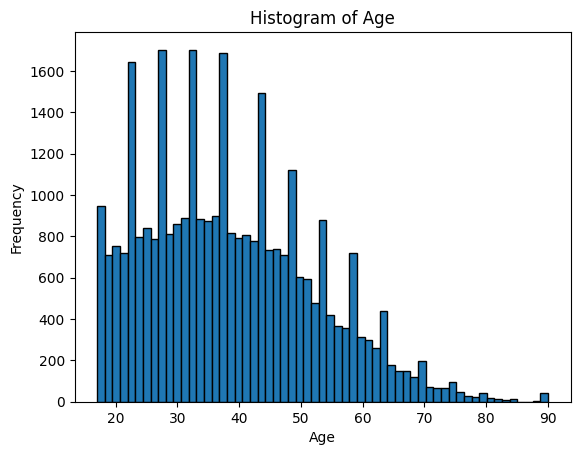

In [202]:
plot_data_distribution_by_column(df, "age")

In [254]:
null_or_empty_counts = (df.isna().sum(axis=0) + (df == '').sum(axis=0)).to_dict()
null_or_empty_counts

{'age': 0,
 'workclass': 0,
 'fnlwgt': 0,
 'education': 0,
 'education.num': 0,
 'marital.status': 0,
 'occupation': 0,
 'relationship': 0,
 'race': 0,
 'sex': 0,
 'capital.gain': 0,
 'capital.loss': 0,
 'hours.per.week': 0,
 'native.country': 0,
 'income': 0}

In [270]:
pd.DataFrame.from_dict(null_or_empty_counts, orient='index', columns=['Number of Null & Empty Values'])

Number of Null & Empty Values
age                                         0
workclass                                   0
fnlwgt                                      0
education                                   0
education.num                               0
marital.status                              0
occupation                                  0
relationship                                0
race                                        0
sex                                         0
capital.gain                                0
capital.loss                                0
hours.per.week                              0
native.country                              0
income                                      0

In [ ]:
def generate_stats(df: pd.DataFrame, target_col: str, sensitive_col: [str]):
    
    pass

# ToDo
## Overview 

### Dataset statistics
Number of variables	8
Number of observations	561
Missing cells	412
Missing cells (%)	9.2%
Duplicate rows	0
Duplicate rows (%)	0.0%
Total size in memory	254.0 KiB
Average record size in memory	463.7 

### Variable types | how many: 
Text	6, Categorical	2



## Alerts:

type has constant value "bike"	Constant
mileage has 17 (3.0%) missing values	Missing
cc has 106 (18.9%) missing values	Missing
power has 289 (51.5%) missing values	Missing
name has unique values

# ToDO:

for each column (select box):
Distinct	561
Distinct (%)	100.0%
Missing	0
Missing (%)	0.0%
Memory size	35.8 KiB